In [62]:
import numpy as np 
import pandas as pd
import pickle, glob
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')

from soundscape_viewer import lts_viewer
from soundscape_viewer import gdrive_handle
from source_separation import pcnmf
from soundscape_viewer import data_organize, clustering
from source_separation import source_separation
from utility import matrix_operation
import interactive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/Volumes/home/DataBase/PAM_pickle/2021/
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_051900-060611-5min.pkl
(5316, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_070100-071811-5min.pkl
(5038, 512)
Loading file: /Volumes/home/DataBase/PAM_pickle/2021/Keelung_082300-091910-5min.pkl
(5312, 512)
(15666, 511)


(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

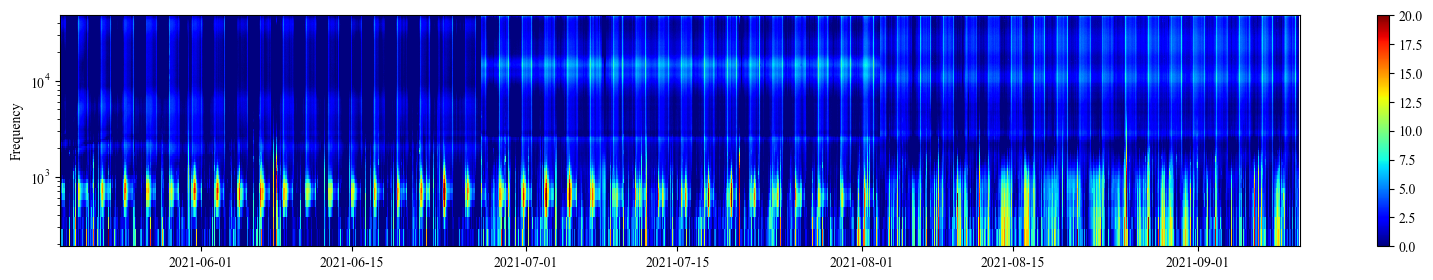

In [67]:
place = 'Keelung'
year = 2021
LTS=lts_viewer(path=f'/Volumes/home/DataBase/PAM_pickle/{year}/', place=place)
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,48000])#


if time.shape[0] > input_data.shape[0]:
    print('time problem')
    time = time[1:]
    
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=20, fig_width=20, fig_height=3, lts=False)

In [68]:
if place == 'Keelung':
    print(place)
    # file = open('../Results/soundsepration/Keelung/20231116_151017_3stages_separation/model_array.pkl' , 'rb')
    path = glob.glob(f'../Results/soundsepration/Keelung-5min/2023*_{year}_3stage_separation/model_array.pkl')[0]
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
elif place == 'Taoyuan':
    print(place)
    # 30 min resolution
    # file = open('../Results/soundsepration/Taoyuan/20231120_112318_3stage_separation_combined/model_array.pkl' , 'rb')
    # 5 min resolution 
    path = glob.glob(f'../Results/soundsepration/Taoyuan-5min/2023*_{year}_3stage_separation/model_array.pkl')[0]
    file = open(path , 'rb')
    model = pickle.load(file)
    file.close()
    
    if year == 2022:
        import datetime
        time = np.hstack([time, datetime.datetime(2022, 8, 25, 16, 55)])        

Keelung


In [69]:
save = True

analysis_result=data_organize()

s = 1
print(f'Source: {s}; Fish ')
model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
cluster_result=clustering(pca_percent=0.95, k=0.95)
cluster_result.run(input_data=model['separation'][s-1], f=f, time=time )#,standardization='max-min')    #
if save:
    savepath = path.rsplit('/', 1)[0]
    cluster_result.save_cluster_feature(filename=f'{savepath}/{place}_S{s}_cluster_scene_features_nostd.csv')
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

print()
print()


# s = 3

# print(f'Source: {s}')
# model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
# model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
# analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
# cluster_result=clustering(pca_percent=0.95, k=0.9)
# cluster_result.run(input_data=model['separation'][s-1], f=f, time=time)    #, standardization='max-min'
# if save:
#     cluster_result.save_cluster_feature(filename=f'../Results/soundsepration/{place}_S{s}_cluster_scene_features.csv')
# analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

if save:
    analysis_result.save_csv(f'{savepath}/{place}_S{s}_cluster_nostd.csv')

A new spreadsheet has been created.
Source: 1; Fish 
dimension reduction by PCA ......
comp: 3, ratio:[0.82597458 0.09898674 0.04543138]
Begining to cluster ......
k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.6194635824322172
k: 3 , explained variation: 0.7249137970841244
k: 4 , explained variation: 0.7919959838077719
k: 5 , explained variation: 0.8471826943917945
k: 6 , explained variation: 0.8752173225489196
k: 7 , explained variation: 0.8928492131750899
k: 8 , explained variation: 0.9095282607991048
k: 9 , explained variation: 0.9200571650546923
k: 10 , explained variation: 0.9287354943644159
k: 11 , explained variation: 0.9372721266588379
k: 12 , explained variation: 0.9429862024842063
k: 13 , explained variation: 0.9477874189975455
k: 14 , explained variation: 0.951383830089098
Final trial: run  14  clusters
Successifully save to ../Results/soundsepration/Keelung-5min/20231206_162010_2021_3stage_separation/Keelung_S1_cluster_scene_features_nostd.csv


Successifull

## Plot plot_diurnal

Index(['Time', 'S1_level', 'S1_Cluster'], dtype='object')
114


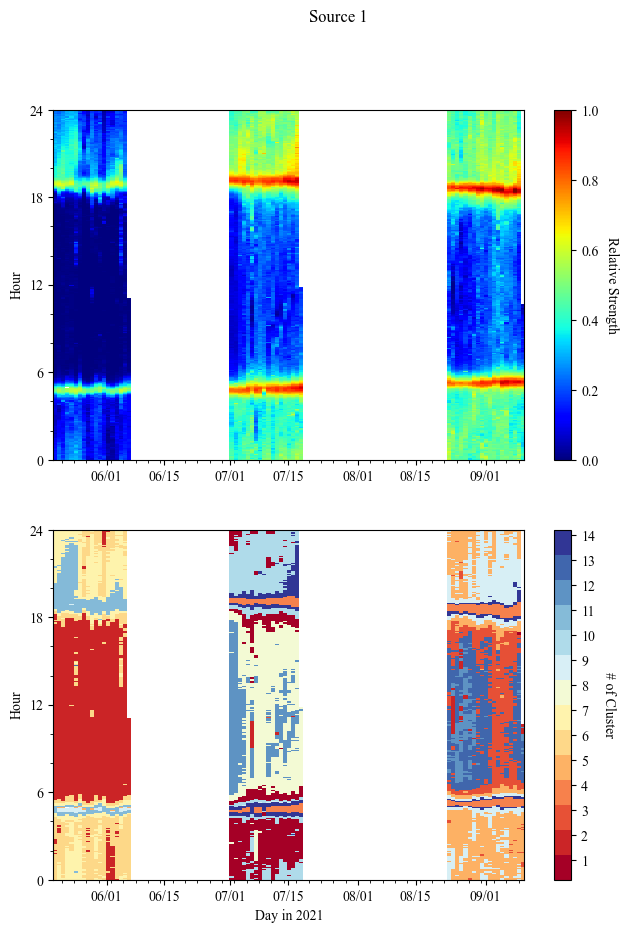

In [70]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
for i in [1]:# range(1, 5):
    level, cluster = analysis_result.plot_diurnal(col=i, savefig = save,
                                                  file = f'{savepath}/{place}_{year}_diurnal_variations_nostd', 
                                                  nan_value=-1,
                                                  ) 